# **Research on Artificial Intelligence algortihms on Satellite Imagery**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data conversion from low resolution to high resolution

In [ ]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
%cd /content/drive/MyDrive/Steve
!git clone https://github.com/xinntao/Real-ESRGAN.git

In [ ]:
%cd /content/drive/MyDrive/Steve/Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
%cd ..

/content/drive/.shortcut-targets-by-id/1BRRPB9_CUHyVXrnrQJi2jTsVJefegs8Q/Steve/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 31.3 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=cb789c543399807aa12ae40110e6f8def677d8b67f6230fbd9976552bbcc6a9b
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.

In [ ]:
# Reading the images in numpy format
import numpy as np

file_path = '/content/drive/MyDrive/Steve/data/original_images.npy'
original_images = np.load(file_path)

file_path = '/content/drive/MyDrive/Steve/data/labels.pkl'
original_labels = np.load(file_path, allow_pickle=True)

In [ ]:
len(list(original_images)), len(list(original_labels))

(900, 900)

In [ ]:
%cd /content/drive/MyDrive/Steve/Real-ESRGAN

import os, cv2
from google.colab import files
from PIL import Image
import shutil

upload_folder = '/content/drive/MyDrive/Steve/Real-ESRGAN/upload'
result_folder = '/content/drive/MyDrive/Steve/Real-ESRGAN/results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# save images to upload folder
for i, image in enumerate(original_images):
    img = Image.fromarray(image)
    img_path = os.path.join(upload_folder, f'image_{i}_{original_labels[i]}.png')
    img.save(img_path)

%cd ..

/content/drive/.shortcut-targets-by-id/1BRRPB9_CUHyVXrnrQJi2jTsVJefegs8Q/Steve/Real-ESRGAN
/content/drive/.shortcut-targets-by-id/1BRRPB9_CUHyVXrnrQJi2jTsVJefegs8Q/Steve


In [ ]:
# Apply ESRGAN
%cd /content/drive/MyDrive/Steve/Real-ESRGAN
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload -o results --outscale 4
%cd ..

/content/drive/.shortcut-targets-by-id/1BRRPB9_CUHyVXrnrQJi2jTsVJefegs8Q/Steve/Real-ESRGAN
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Paths:  ['upload/image_0_haze primary.png', 'upload/image_100_cloudy.png', 'upload/image_101_agriculture clear primary road.png', 'upload/image_102_haze primary.png', 'upload/image_103_partly_cloudy primary.png', 'upload/image_104_agriculture clear habitation primary road.png', 'upload/image_105_agriculture clear habitation primary road.png', 'upload/image_106_cloudy.png', 'upload/image_107_partly_cloudy primary.png', 'upload/image_108_clear cultivation primary.png', 'upload/image_109_partly_cloudy primary.png', 'upload/image_10_cloudy.pn

In [ ]:
set(original_labels)

{'agriculture clear habitation primary road',
 'agriculture clear primary road',
 'agriculture partly_cloudy primary',
 'clear cultivation primary',
 'clear primary selective_logging',
 'clear primary water',
 'cloudy',
 'haze primary',
 'partly_cloudy primary'}

* Reduce the classes as high quantity of data requires more time and more resources.

In [3]:
import os
img_paths = os.listdir("/content/drive/MyDrive/Steve/Real-ESRGAN/results/")

In [4]:
import cv2
from tqdm import tqdm

classes_to_consider = {
    'agriculture clear primary road',
    'clear primary water',
    'cloudy',
    'haze primary',
    'partly_cloudy primary'
}

images = []
labels = []

for path in tqdm(img_paths):
    current_labels = "_".join(path.split('_')[2:-1])

    if current_labels in classes_to_consider:
        labels.append(current_labels)
        img = cv2.imread("/content/drive/MyDrive/Steve/Real-ESRGAN/results/" + path)
        images.append(img)


100%|██████████| 900/900 [01:22<00:00, 10.89it/s] 


In [5]:
set(labels)

{'agriculture clear primary road',
 'clear primary water',
 'cloudy',
 'haze primary',
 'partly_cloudy primary'}

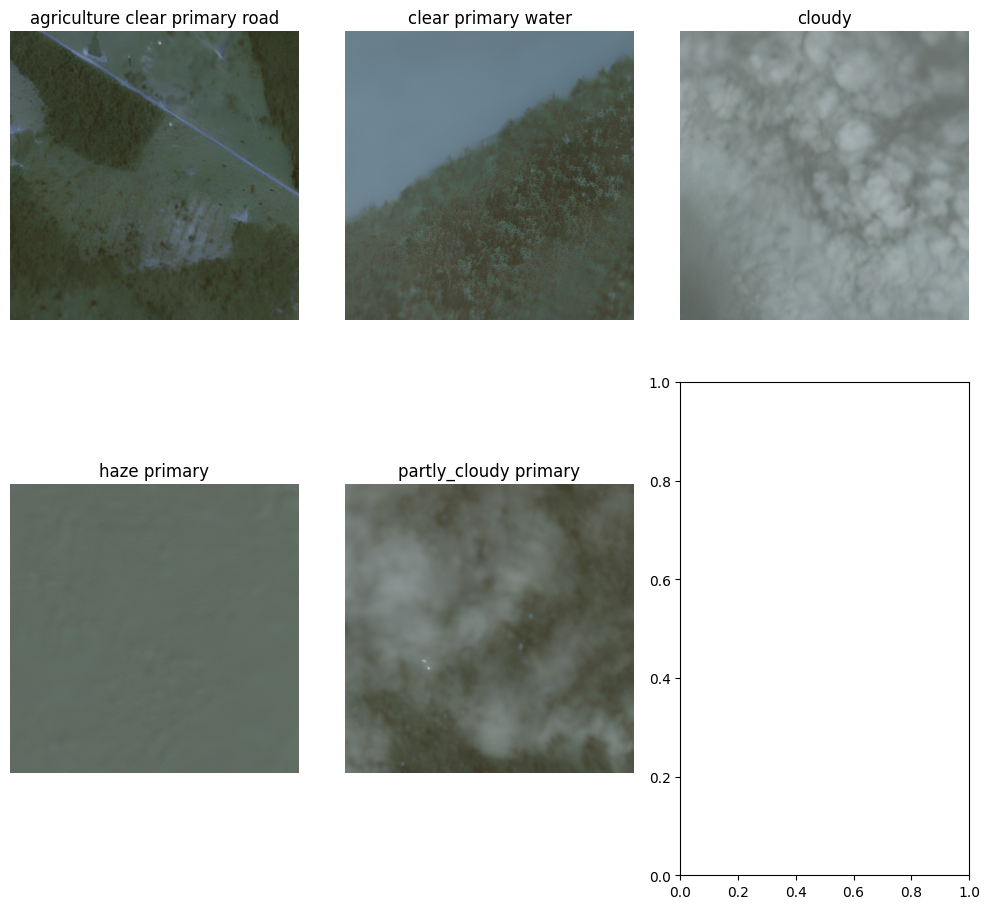

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_images_by_class(labels, images):
    unique_labels = np.unique(labels)

    # Calculate the number of subplots needed
    num_classes = len(unique_labels)
    num_rows = 2
    num_cols = 3

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    # Iterate through each class and corresponding image
    for i, label in enumerate(unique_labels):
        # Find indices of images with the current label
        indices = [index for index, l in enumerate(labels) if l == label]

        # Take up to 3 images for each class (adjust as needed)
        indices = indices[:3]

        # Iterate through selected images for the current class
        for j, index in enumerate(indices):
            # Calculate subplot position
            row = i // num_cols
            col = i % num_cols

            # Display the image with the label as the title
            axes[row, col].imshow(images[index])
            axes[row, col].set_title(f"{label}")
            axes[row, col].axis('off')  # Turn off axis labels

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()


show_images_by_class(labels, images)


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
enc = LabelEncoder()
labels = enc.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
enc.classes_

array(['agriculture clear primary road', 'clear primary water', 'cloudy',
       'haze primary', 'partly_cloudy primary'], dtype='<U30')

In [9]:
# saving the images and labels again to save memory consumption
np.save('/content/drive/MyDrive/Steve/secondary/enhanced_images.npy', images)
np.save('/content/drive/MyDrive/Steve/secondary/enhanced_labels.npy', labels)

In [10]:
import numpy as np

file_path = '/content/drive/MyDrive/Steve/secondary/enhanced_images.npy'
images = np.load(file_path)

file_path = '/content/drive/MyDrive/Steve/secondary/enhanced_labels.npy'
labels = np.load(file_path, allow_pickle=True)

In [11]:
labels.shape

(500, 5)

In [12]:
import cv2
new_width = 64
new_height = 64
resized_images = np.array([cv2.resize(image, (new_width, new_height)) for image in images])/255

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42, stratify = labels)

# Convert to NumPy Arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
X_train.shape, y_train.shape

((400, 64, 64, 3), (400, 5))

## Convolution Neural Network

In [14]:
# Define the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(new_width, new_height, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    # Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
13/13 [==============================] - 13s 72ms/step - loss: 1.6075 - accuracy: 0.2200 - val_loss: 1.5956 - val_accuracy: 0.2000
Epoch 2/50
13/13 [==============================] - 0s 11ms/step - loss: 1.5883 - accuracy: 0.2000 - val_loss: 1.5755 - val_accuracy: 0.2000
Epoch 3/50
13/13 [==============================] - 0s 11ms/step - loss: 1.5572 - accuracy: 0.2250 - val_loss: 1.5791 - val_accuracy: 0.2500
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 1.5397 - accuracy: 0.2850 - val_loss: 1.4968 - val_accuracy: 0.4000
Epoch 5/50
13/13 [==============================] - 0s 11ms/step - loss: 1.4470 - accuracy: 0.3400 - val_loss: 1.3450 - val_accuracy: 0.3800
Epoch 6/50
13/13 [==============================] - 0s 16ms/step - loss: 1.3092 - accuracy: 0.3950 - val_loss: 1.2296 - val_accuracy: 0.3600
Epoch 7/50
13/13 [==============================] - 0s 11ms/step - loss: 1.2944 - accuracy: 0.3950 - val_loss: 1.2628 - val_accuracy: 0.4800
Epoch 8/50
1

In [15]:
# Evaluate the model
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {cnn_loss}, Test Accuracy: {cnn_accuracy}')

4/4 [==============================] - 0s 8ms/step - loss: 1.0333 - accuracy: 0.6400
Test Loss: 1.0332589149475098, Test Accuracy: 0.6399999856948853


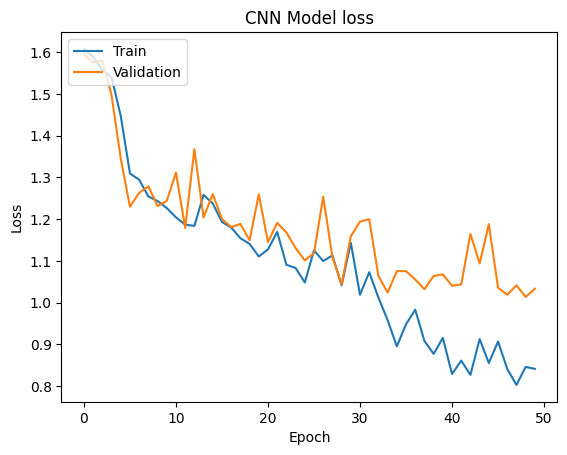

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

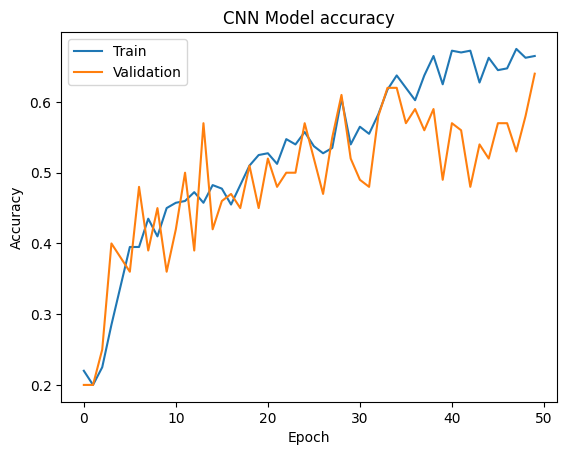

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Transfer Learning: Visual Geometry Group

In [20]:
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load the pre-trained VGG19 model without the top layer (include_top=False)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(new_width, new_height, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create your model by adding the VGG19 base model and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

80134624/80134624 [==============================] - 1s 0us/step


Epoch 1/50
13/13 [==============================] - 5s 155ms/step - loss: 1.8098 - accuracy: 0.2450 - val_loss: 1.3997 - val_accuracy: 0.4500
Epoch 2/50
13/13 [==============================] - 0s 30ms/step - loss: 1.4004 - accuracy: 0.3900 - val_loss: 1.2705 - val_accuracy: 0.4300
Epoch 3/50
13/13 [==============================] - 0s 36ms/step - loss: 1.2421 - accuracy: 0.4675 - val_loss: 1.1659 - val_accuracy: 0.5700
Epoch 4/50
13/13 [==============================] - 0s 37ms/step - loss: 1.1764 - accuracy: 0.4475 - val_loss: 1.0607 - val_accuracy: 0.5100
Epoch 5/50
13/13 [==============================] - 0s 27ms/step - loss: 1.0608 - accuracy: 0.4900 - val_loss: 0.9787 - val_accuracy: 0.6700
Epoch 6/50
13/13 [==============================] - 0s 25ms/step - loss: 0.9846 - accuracy: 0.5525 - val_loss: 0.9340 - val_accuracy: 0.6300
Epoch 7/50
13/13 [==============================] - 0s 30ms/step - loss: 0.9718 - accuracy: 0.5775 - val_loss: 0.9025 - val_accuracy: 0.6600
Epoch 8/50
1

In [21]:
# Evaluate the model
vgg_loss, vgg_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {vgg_loss}, Test Accuracy: {vgg_accuracy}')

4/4 [==============================] - 0s 16ms/step - loss: 0.7273 - accuracy: 0.7600
Test Loss: 0.72734534740448, Test Accuracy: 0.7599999904632568


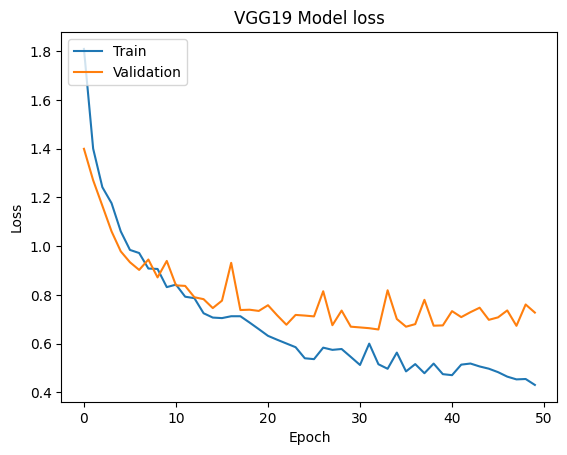

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG19 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

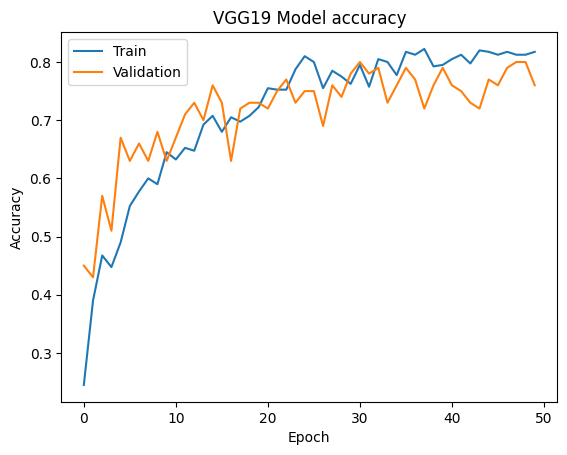

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG19 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Transfer Learning: DenseNet

In [61]:
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load the pre-trained DenseNet121 model without the top layer (include_top=False)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(new_width, new_height, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create your model by adding the DenseNet121 base model and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 10s 201ms/step - loss: 1.5565 - accuracy: 0.4300 - val_loss: 1.3184 - val_accuracy: 0.4700
Epoch 2/100
13/13 [==============================] - 0s 35ms/step - loss: 0.9121 - accuracy: 0.6375 - val_loss: 0.8311 - val_accuracy: 0.7200
Epoch 3/100
13/13 [==============================] - 0s 38ms/step - loss: 0.6976 - accuracy: 0.7225 - val_loss: 0.7757 - val_accuracy: 0.7200
Epoch 4/100
13/13 [==============================] - 0s 38ms/step - loss: 0.5353 - accuracy: 0.7850 - val_loss: 0.8736 - val_accuracy: 0.6800
Epoch 5/100
13/13 [==============================] - 0s 31ms/step - loss: 0.5140 - accuracy: 0.7750 - val_loss: 0.8023 - val_accuracy: 0.7600
Epoch 6/100
13/13 [==============================] - 0s 38ms/step - loss: 0.4113 - accuracy: 0.8400 - val_loss: 0.8336 - val_accuracy: 0.7400
Epoch 7/100
13/13 [==============================] - 1s 40ms/step - loss: 0.4256 - accuracy: 0.8075 - val_loss: 0.7700 - val_accuracy: 0.7600
Epoc

In [62]:
# Evaluate the model
densenet_loss, densenet_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {densenet_loss}, Test Accuracy: {densenet_accuracy}')

4/4 [==============================] - 0s 26ms/step - loss: 1.2537 - accuracy: 0.8000
Test Loss: 1.2537033557891846, Test Accuracy: 0.800000011920929


In [63]:
X_test.shape

(100, 64, 64, 3)

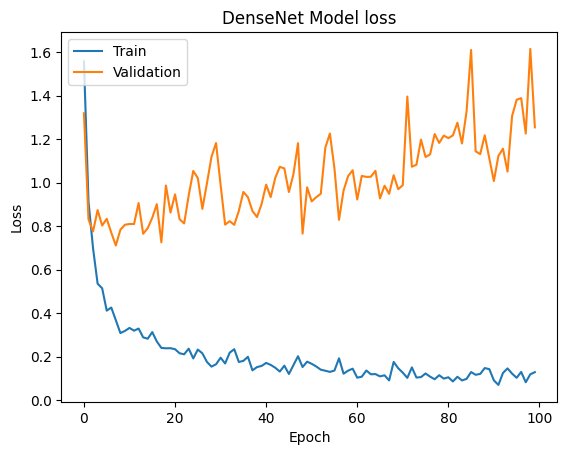

In [64]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DenseNet Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

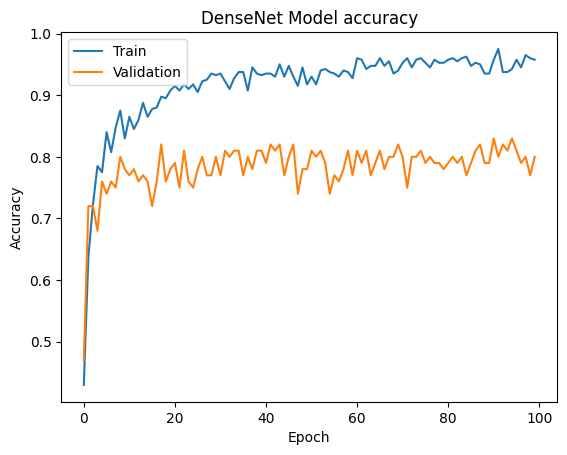

In [65]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DenseNet Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [66]:
# Save the model
model.save_weights("/content/drive/MyDrive/Steve/saved_model_weights.h5")

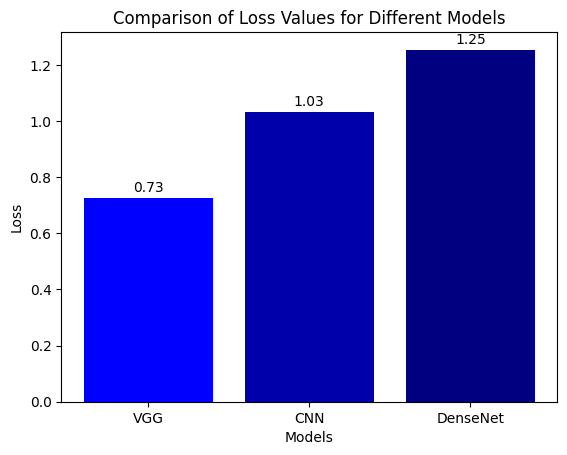

In [67]:
# List of models and their corresponding losses
models = ['VGG', 'CNN', 'DenseNet']
loss_values = [vgg_loss, cnn_loss, densenet_loss]

# Choose a single color (blue) and its shades
base_color = np.array([0, 0, 1])  # Blue color
colors = [base_color, base_color / 1.5, base_color / 2]

# Create a bar plot
plt.bar(models, loss_values, color=colors)

# Add labels to each bar
for i, value in enumerate(loss_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('Comparison of Loss Values for Different Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()

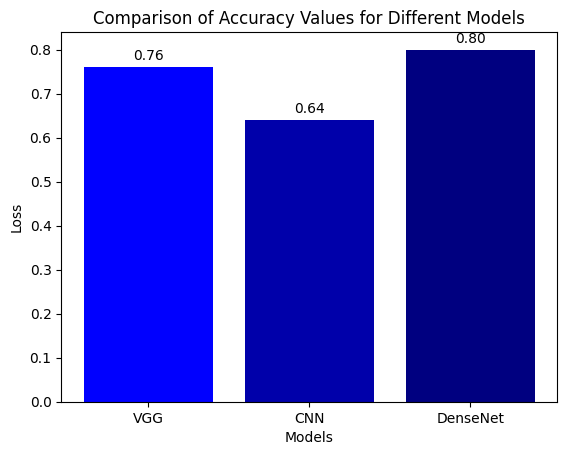

In [68]:
# List of models and their corresponding losses
models = ['VGG', 'CNN', 'DenseNet']
loss_values = [vgg_accuracy, cnn_accuracy, densenet_accuracy]

# Choose a single color (blue) and its shades
base_color = np.array([0, 0, 1])  # Blue color
colors = [base_color, base_color / 1.5, base_color / 2]

# Create a bar plot
plt.bar(models, loss_values, color=colors)

# Add labels to each bar
for i, value in enumerate(loss_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('Comparison of Accuracy Values for Different Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()

In [71]:
import pandas as pd
# List of models
models = ['VGG', 'CNN', 'DenseNet']

# Accuracy values
accuracy_values = [vgg_accuracy, cnn_accuracy, densenet_accuracy]

# Loss values
loss_values = [vgg_loss, cnn_loss, densenet_loss]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_values,
    'Loss': loss_values
})

# Display the DataFrame
print(results_df)


      Model  Accuracy      Loss
0       VGG      0.76  0.727345
1       CNN      0.64  1.033259
2  DenseNet      0.80  1.253703


In [69]:
!nvidia-smi

Sun Mar 10 14:38:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0              32W /  70W |   8321MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--